In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

suicide = pd.read_csv("Suicide data.csv")
suicide.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


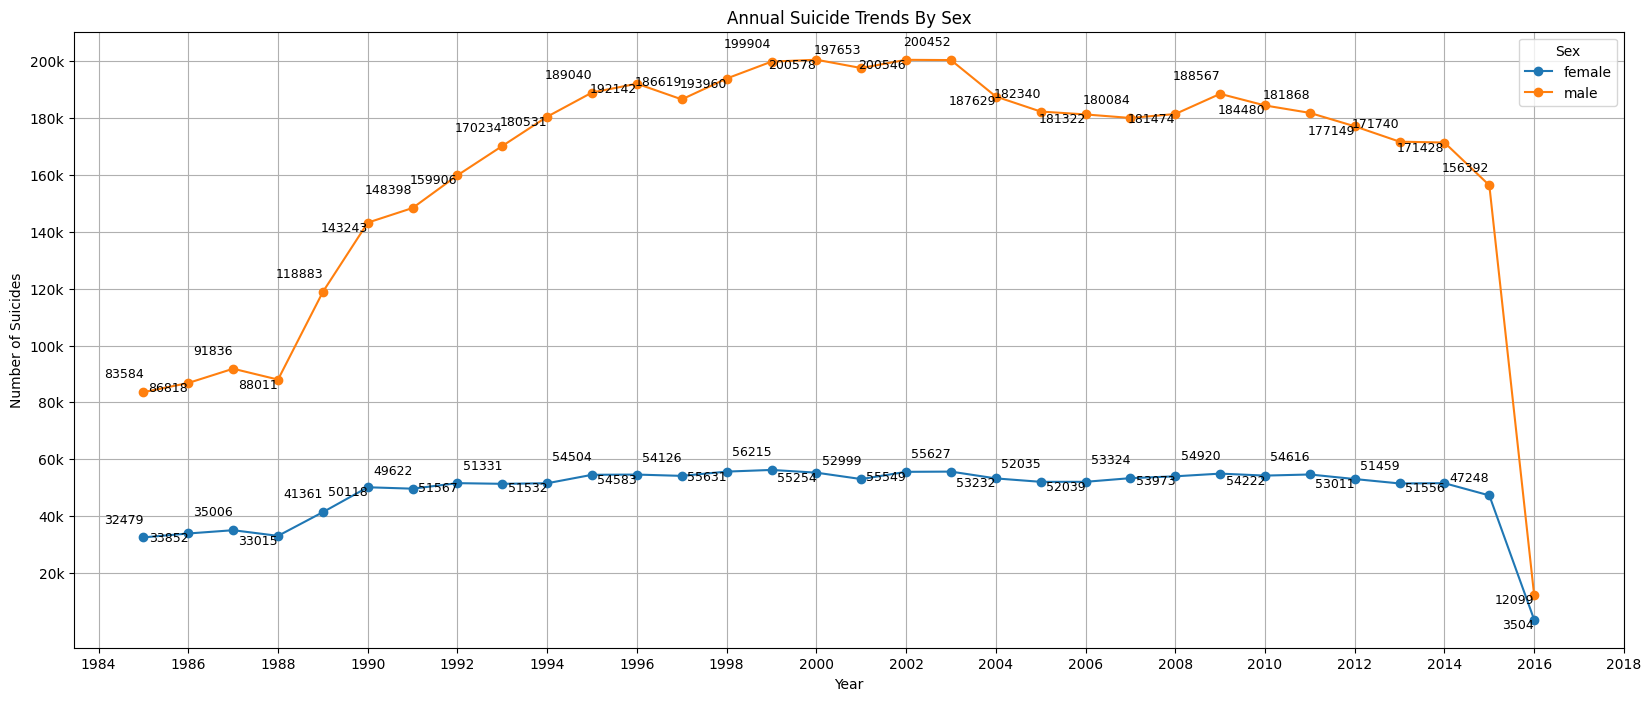

In [49]:
import matplotlib.pyplot as plt

# Group by year and sex, then sum the suicides
suicide_grouped = suicide.groupby(['year', 'sex'])['suicides_no'].sum().unstack()

# Create figure
plt.figure(figsize=(20, 8))
Suicide_years = [1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018]
Suicide_annual = [20e3, 40e3, 60e3, 80e3, 100e3, 120e3, 140e3, 160e3, 180e3, 200e3]
# Plot each sex separately
for sex in suicide_grouped.columns:
    plt.plot(suicide_grouped.index, suicide_grouped[sex], marker='o', label=sex)

    z = 1
    # Annotate each point with its value
    for x, y in zip(suicide_grouped.index, suicide_grouped[sex]):
        plt.text(x, y+4000*z, f"{y:.0f}", ha='right', va='bottom', fontsize=9)
        z = -z

# Labels and title
plt.title("Annual Suicide Trends By Sex")
plt.xlabel("Year")
plt.ylabel("Number of Suicides")
plt.legend(title="Sex")
plt.xticks(Suicide_years)
plt.yticks(Suicide_annual, labels=['20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k'])
plt.grid(True)

# Show plot
plt.show()